# Poisson Distribution

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

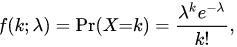

The Poisson distribution has the following properties:
* The mean of the distribution is equal to μ .
* The variance is also equal to μ .

## Problems

### Question:
On a booking counter on the average 3.6 people come every 10 minutes on weekends. What is the probability of getting 7 people in 10 minutes?

#### Solution 1:
Using math

In [2]:
# P(x,μ)=e−μ⋅μx/x!
x = 7
mu = 3.6
p_of_seven_math = math.exp(-mu) * mu**x / math.factorial(7)
p_of_seven_math

0.04248414026930939

#### Solution 2:
Using numpy

In [7]:
# Generating Poisson random number based on lambda/mean=3.6 
np.random.poisson(lam=3.6, size=10)

array([3, 3, 3, 4, 2, 5, 3, 4, 0, 4])

In [8]:
booking_q_size = np.random.poisson(lam=3.6, size=1000)
booking_q_size

array([ 4,  5,  3,  5,  5,  1,  2,  6,  1,  1,  2,  3,  3,  1,  2,  2,  2,
        2,  6,  3,  5,  4,  3,  6,  5,  5,  2,  4,  1,  4,  4,  2,  5,  6,
        2,  0,  8,  3,  5,  7,  6,  3,  6,  1,  4,  5,  1,  4,  2,  8,  3,
        1,  0,  2,  4,  3,  3,  5,  2,  5,  5,  1,  1,  5,  5,  3,  1,  7,
        4,  5,  2,  4,  6,  2,  2,  0,  3,  1,  2,  4,  2,  3,  1,  6,  6,
        8,  1,  5,  3,  3,  3,  6,  1,  0,  5,  5,  2,  1,  4,  3,  0,  5,
        0,  5,  4,  6,  3,  0,  4,  3,  2,  2,  5,  6,  3,  0,  4,  5,  2,
        3,  3,  6,  3,  5,  6,  3,  4,  6,  5,  7,  7,  5,  3,  3,  3,  6,
        8,  4,  3,  2,  2,  5,  4,  3,  1,  4,  1,  3,  1,  4,  3,  4,  1,
        4,  2,  3,  2,  3,  2,  2,  5,  3,  4,  2,  2,  2,  1,  4,  5,  3,
        2,  2,  4,  5,  7,  4,  5,  2,  3,  2,  5,  5,  3,  1,  1,  3,  6,
        3,  4,  6,  5,  5,  4,  3,  2,  4,  2,  3,  5,  0,  1,  3,  3,  5,
        2,  3,  8,  2,  4, 11,  4,  4,  4,  5,  4,  4,  7,  3,  3,  5,  3,
        3,  3,  1,  3,  3

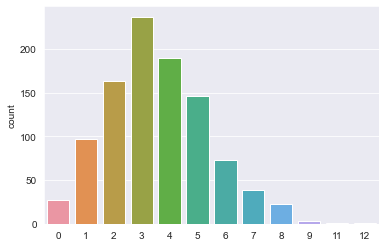

In [10]:
sns.set_style(style='darkgrid')
sns.countplot(x=booking_q_size)
plt.show()

In [14]:
p_of_seven_stats = stats.poisson.pmf(k=7, mu=3.6)
print(f"""
The probability of getting 7 people in 10 minutes when the mean is 3.6 people is
Using Stats PMF: {p_of_seven_stats}
or
Using Np Formula: {p_of_seven_math}""")


The probability of getting 7 people in 10 minutes when the mean is 3.6 people is
Using Stats PMF: 0.04248414026930935
or
Using Np Formula: 0.04248414026930939


In [16]:
print(f"""
The probability of getting less than or equal to 7 people in 10 minutes when the mean is 3.6 people is
Using Stats CDF: {stats.poisson.cdf(k=7, mu=3.6)}
or
Using Stats PMF: {sum([stats.poisson.pmf(k=k, mu=3.6) for k in np.arange(0, 8)])}""")


The probability of getting less than or equal to 7 people in 10 minutes when the mean is 3.6 people is
Using Stats CDF: 0.9692107246403425
or
Using Stats PMF: 0.9692107246403422


In [18]:
print(f"""
The probability of getting more than 7 people in 10 minutes when the mean is 3.6 people is
Using Stats CDF: {1- stats.poisson.cdf(k=7, mu=3.6)}
or
Using Stats PMF: {stats.poisson.sf(k=7, mu=3.6)}""")


The probability of getting more than 7 people in 10 minutes when the mean is 3.6 people is
Using Stats CDF: 0.030789275359657475
or
Using Stats PMF: 0.030789275359657444


In [13]:
stats.poisson.mean(mu=3.6)

3.6

In [14]:
stats.poisson.var(mu=3.6)

3.6

In [15]:
stats.poisson.std(mu=3.6)

1.8973665961010275

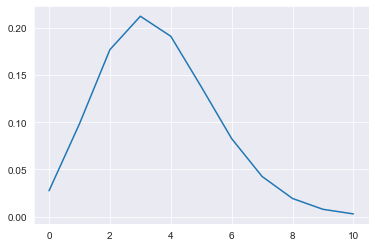

In [20]:
sns.set_style(style='darkgrid')
sns.lineplot(x=np.arange(0, 11), y=stats.poisson.pmf(k=np.arange(0, 11), mu=3.6))
plt.show()

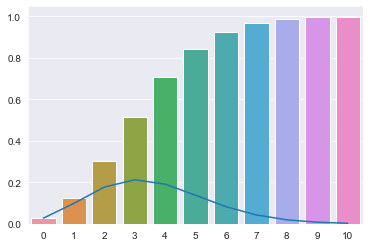

In [21]:
sns.set_style(style='darkgrid')
sns.lineplot(x=np.arange(0, 11), y=stats.poisson.pmf(k=np.arange(0, 11), mu=3.6))
sns.barplot(x=np.arange(0, 11), y=stats.poisson.cdf(k=np.arange(0, 11), mu=3.6))
plt.show()

## Problem Statement 
Given that a bank has a footfall of 6 people per minute, find out the

a) probability distribution for upto 20 people per minute<br> b) probability of at least 4 people per minute

In [3]:
# Since the rate is 6 people per minute
rate = 6

In [4]:
# Since we are meausing the customer upto 20 people per minute, lets generate the poisson dist from 0 to 19
n = np.arange(0, 20)
poisson_dist = stats.poisson.pmf(n, rate)
poisson_dist

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

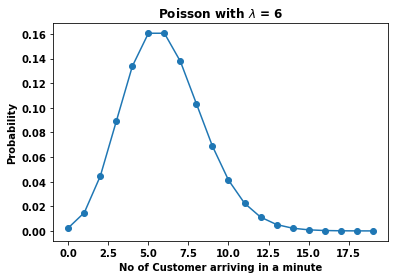

In [5]:
# Lets plot the distribution
plt.plot(n, poisson_dist, 'o-')
plt.title('Poisson with $\lambda$ = {}'.format(rate))
plt.xlabel('No of Customer arriving in a minute')
plt.ylabel('Probability')
plt.show()

#### a) probability distribution for upto 20 people per minute

In [6]:
p_upto=0
for i in range(20):
    p_upto = p_upto + poisson_dist[i]

print(p_upto)

0.9999948198310626


In [7]:
stats.poisson.cdf(k=20, mu=6)

0.99999854489301

#### b) probability of at least 4 people per minute

In [8]:
# Using PMF
p_4atleast = 1- (poisson_dist[0] + poisson_dist[1]+poisson_dist[2]+poisson_dist[3])
p_4atleast

0.8487961172233521

In [10]:
# Using CDF
1 - stats.poisson.cdf(k=3, mu=6)

0.8487961172233521

In [12]:
# Using SF
stats.poisson.sf(k=3, mu=6)

0.8487961172233521